## Categorical Plot
### seaborn.stripplot
seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
Draw a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

Input data can be passed in a variety of formats, including:

Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

A “wide-form” DataFrame, such that each numeric column will be plotted.

An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes. Additionally, you can use Categorical types for the grouping variables to control the order of plot elements.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

See the tutorial for more information.

Parameters
x, y, huenames of variables in data or vector data, optional
Inputs for plotting long-form data. See examples for interpretation.

dataDataFrame, array, or list of arrays, optional
Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

order, hue_orderlists of strings, optional
Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

jitterfloat, True/1 is special-cased, optional
Amount of jitter (only along the categorical axis) to apply. This can be useful when you have many points and they overlap, so that it is easier to see the distribution. You can specify the amount of jitter (half the width of the uniform random variable support), or just use True for a good default.

dodgebool, optional
When using hue nesting, setting this to True will separate the strips for different hue levels along the categorical axis. Otherwise, the points for each level will be plotted on top of each other.

orient“v” | “h”, optional
Orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.

colormatplotlib color, optional
Color for all of the elements, or seed for a gradient palette.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

sizefloat, optional
Radius of the markers, in points.

edgecolormatplotlib color, “gray” is special-cased, optional
Color of the lines around each point. If you pass "gray", the brightness is determined by the color palette used for the body of the points.

linewidthfloat, optional
Width of the gray lines that frame the plot elements.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

kwargskey, value mappings
Other keyword arguments are passed through to matplotlib.axes.Axes.scatter().

Returns
axmatplotlib Axes
Returns the Axes object with the plot drawn onto it.

Examples

Draw a single horizontal strip plot:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


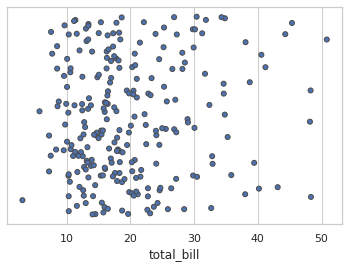

In [13]:
sns.stripplot(tips['total_bill'],linewidth=1)
plt.show()

Group the strips by a categorical variable:

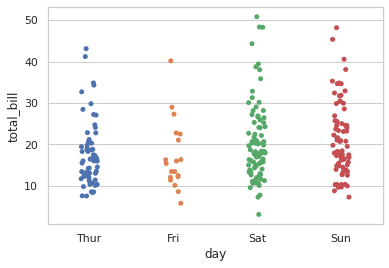

In [11]:
sns.stripplot(y=tips['total_bill'], x=tips['day'],data=tips)
plt.show()

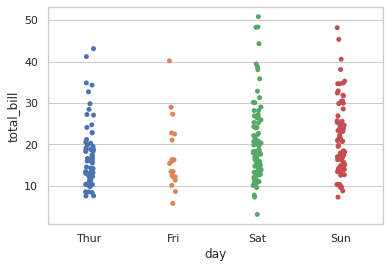

In [12]:
#Use a smaller amount of jitter:

ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

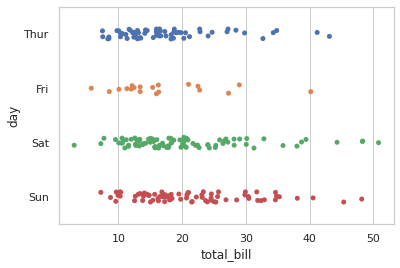

In [14]:
###Draw horizontal strips:

ax = sns.stripplot(x="total_bill", y="day", data=tips)

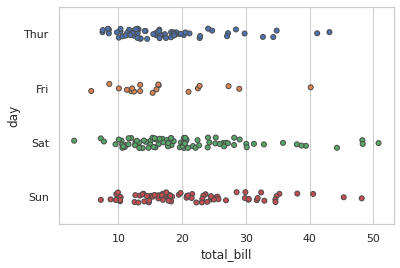

In [15]:
#Draw outlines around the points:

ax = sns.stripplot(x="total_bill", y="day", data=tips,
                   linewidth=1)

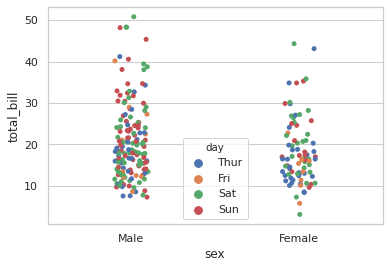

In [16]:
#Nest the strips within a second categorical variable:

ax = sns.stripplot(x="sex", y="total_bill", hue="day", data=tips)

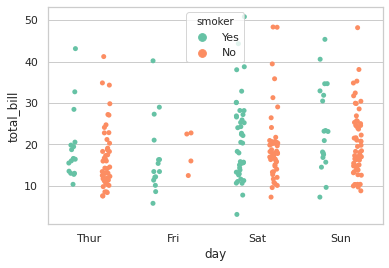

In [17]:
#Draw each level of the hue variable at different locations on the major categorical axis:

ax = sns.stripplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set2", dodge=True)

Control strip order by passing an explicit order:

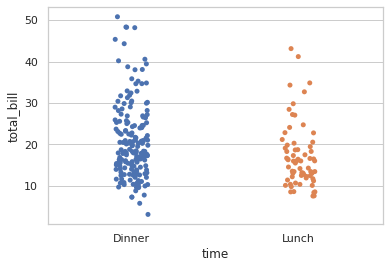

In [18]:
sns.stripplot(x='time', y='total_bill', order=['Dinner', 'Lunch'], data=tips)
plt.show()

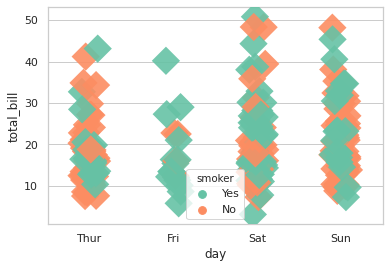

In [20]:
#Draw strips with large points and different aesthetics:

ax =  sns.stripplot("day", "total_bill", "smoker", data=tips,
                   palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.9)

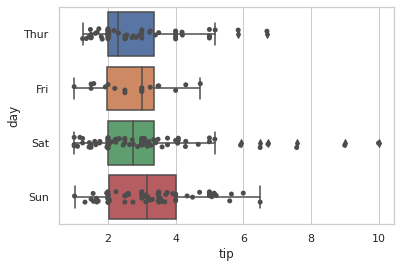

In [24]:
ax = sns.boxplot(x='tip', y='day', data=tips)
ax = sns.stripplot(x='tip', y='day', data=tips, color='0.3')
plt.show()

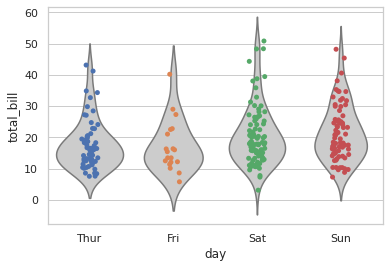

In [26]:
ax = sns.stripplot(x='day', y='total_bill', data=tips)
ax = sns.violinplot(x='day', y='total_bill', data=tips,inner=None, color='0.8')
plt.show()

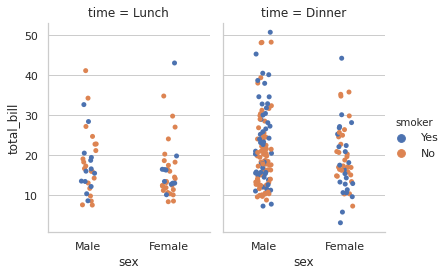

In [27]:
#Use catplot() to combine a stripplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="strip",
                height=4, aspect=.7);